#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219155861

# Student name: Naveen Chuka Radhakrishna

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [1]:
import pandas as pd
import numpy as np
#read the weather dataset 
weather_Dataset= pd.read_csv("/content/sample_data/weather_dataset.csv")
#First 5 rows of the dataset is displayed
weather_Dataset.head()

,recording_date_time,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


In [4]:
#Splitting the test data and training data from weather dataset
testing_Data = weather_Dataset[weather_Dataset['recording_date_time'].str.startswith('2015')| weather_Dataset['recording_date_time'].str.startswith( '2016')] 
training_data = weather_Dataset.drop(index = testing_Data.index, axis=1)

#Excluding the recording_date_time column from the train and test data sets.
test_data = testing_Data.drop(['recording_date_time'],axis=1)
train_data = training_data.drop(['recording_date_time'],axis=1)

#Shape of the test and train data.
print("The shape of Test data: ",test_data.shape)
print("the shape of Train data: ",train_data.shape)

The shape of Test data:  (17544, 9)
the shape of Train data:  (78909, 9)


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

The scatter plot of {'precip_type'} and temperature:


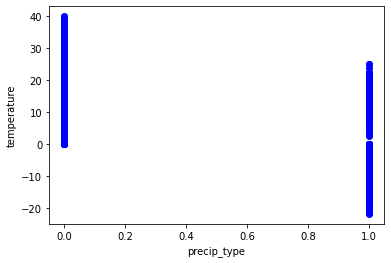

The Pearson’s Correlation Coefficient value between {'precip_type'} and temperature: {-0.5783945936557482}
************************************************************************************************************************
The scatter plot of {'apparent_temperature'} and temperature:


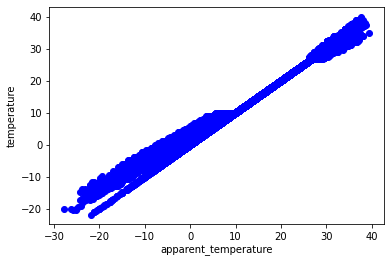

The Pearson’s Correlation Coefficient value between {'apparent_temperature'} and temperature: {0.9924134287248896}
************************************************************************************************************************
The scatter plot of {'humidity'} and temperature:


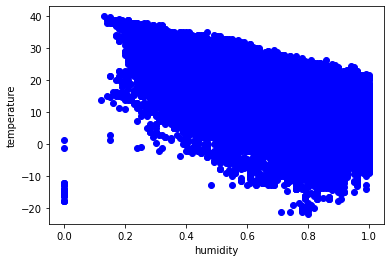

The Pearson’s Correlation Coefficient value between {'humidity'} and temperature: {-0.6316348195850394}
************************************************************************************************************************
The scatter plot of {'wind_speed'} and temperature:


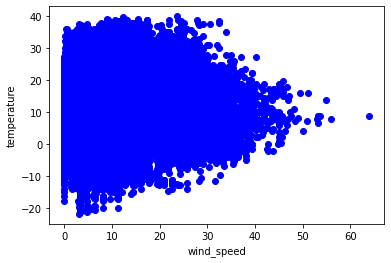

The Pearson’s Correlation Coefficient value between {'wind_speed'} and temperature: {0.010945498975510379}
{'wind_speed'} is insignificant for predicting temperature
************************************************************************************************************************
The scatter plot of {'wind_bearing'} and temperature:


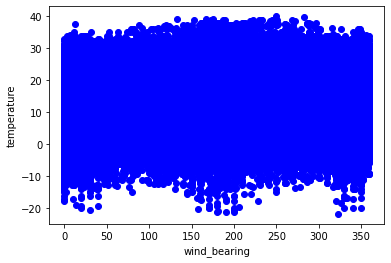

The Pearson’s Correlation Coefficient value between {'wind_bearing'} and temperature: {0.02977102375895863}
{'wind_bearing'} is insignificant for predicting temperature
************************************************************************************************************************
The scatter plot of {'visibility'} and temperature:


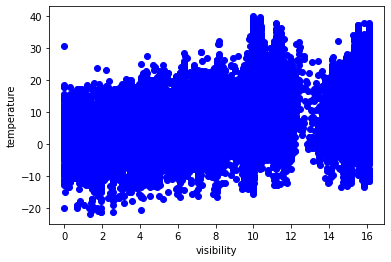

The Pearson’s Correlation Coefficient value between {'visibility'} and temperature: {0.3711535529951888}
{'visibility'} is insignificant for predicting temperature
************************************************************************************************************************
The scatter plot of {'cloud_cover'} and temperature:


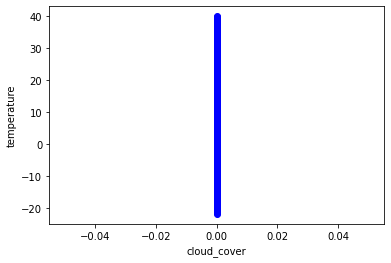

The Pearson’s Correlation Coefficient value between {'cloud_cover'} and temperature: {nan}
{'cloud_cover'} is insignificant for predicting temperature
************************************************************************************************************************
The scatter plot of {'pressure'} and temperature:


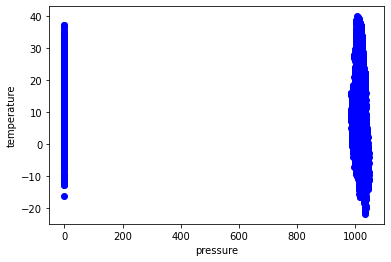

The Pearson’s Correlation Coefficient value between {'pressure'} and temperature: {-0.010479972997426028}
{'pressure'} is insignificant for predicting temperature
************************************************************************************************************************
The significant features for predict tempereture: ['precip_type', 'apparent_temperature', 'humidity']
The insignificant features for predict temperature: ['wind_speed', 'wind_bearing', 'visibility', 'cloud_cover', 'pressure']


In [45]:
from scipy import stats
import matplotlib.pyplot as plt
#Empty list is created for significant and insignificant features 
significant_features = []
insignificant_features = []

#precip type is in str so converted into int 
train_data['precip_type'] =train_data['precip_type'].astype('category').cat.codes

#for loop to find correlation of all features in the dataset keeping temperature as target variable
for col in train_data.drop(["temperature"], axis = 1).columns:
  #scatter plot is done for all the features
    print("The scatter plot of", {col}, "and temperature:")
    plt.scatter(train_data[col],train_data.temperature, color="blue")
    #nameing x and y axis
    plt.xlabel(col)
    plt.ylabel("temperature")
    plt.show()
#pearsonr method is used to find out the correlation between the features in the dataset keeping temperature as target variable
    pearson = stats.pearsonr(train_data[col],train_data.temperature)[0]
    print("The Pearson’s Correlation Coefficient value between", {col}, "and temperature:",{pearson})
    abs_pearson = abs(pearson)
    # The correlation threshold i kept is 0.5 correaltion number greater than 0.5 are considered as significant variables
    if abs_pearson >= 0.5:
        significant_features.append(col)
    #The correlation values less than 0.5 are considered as insignificant features
    else:
        insignificant_features.append(col)
        print({col}, "is insignificant for predicting temperature")
    print("*"*120)

print(f'The significant features for predict tempereture: {significant_features}')
print(f'The insignificant features for predict temperature: {insignificant_features}')

**EXPLANATION:**
**Selecting significant and insignificant features for predicting Temperature:** The recording_date_time column is removed and precip_type feature is in string to obtain a correlation, conversion of categorical features to numerical needed to be done all of our categorical features tend to be binary. If that is not the case we need to plan a custom order. I took the corrleation threshold as 0.5 so features greater than 0.5 are considered as significant and other features are considered as insignificant features.
**Significant features are:** precip_type, apparent_temperature, humidity and **Insignificant features are:** wind_speed, wind_bearing, visibility, cloud_cover, pressure.



3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import scale

#considering the significant features only

#For Train data
Y_train_Linear = train_data.temperature  
X_train_Linear =train_data.drop(['temperature','wind_speed','wind_bearing','pressure','cloud_cover','visibility'],axis=1)
#For Test data
Y_test_Linear = test_data.temperature   
X_test_Linear = test_data.drop(['temperature','wind_speed','wind_bearing','pressure','cloud_cover','visibility'],axis=1)

#Building the model.
regression = LinearRegression()  
regression.fit(X_train_Linear, Y_train_Linear)
X_test_Linear['precip_type'] =X_test_Linear['precip_type'].astype('category').cat.codes
Y_pred_Linear = regression.predict(X_test_Linear)
df_L = pd.DataFrame({'Actual': Y_test_Linear, 'Predicted': Y_pred_Linear})
df1_L = df_L.head(10)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_Linear, Y_pred_Linear))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_Linear, Y_pred_Linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_Linear, Y_pred_Linear)))

Mean Absolute Error: 0.7635283567084328
Mean Squared Error: 0.9453236601477598
Root Mean Squared Error: 0.9722775633263168


4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

In [18]:
#printing correlations for all the features keeping pressure as target variable
print(train_data[train_data.columns[:]].corr()['pressure'][:])
print("Maximum correlation coefficient is: Visibility" )


precip_type             0.018172
temperature            -0.010480
apparent_temperature   -0.005677
humidity                0.005328
wind_speed             -0.046858
wind_bearing           -0.010980
visibility              0.051819
cloud_cover                  NaN
pressure                1.000000
Name: pressure, dtype: float64
Maximum correlation coefficient is: Visibility


In [19]:
import warnings
warnings.filterwarnings('ignore')

#Seperating the target features for Test and train data and considering the significant features.
#For Train data
Y_train_Linearp = train_data.temperature

#consider only pressure and visibility features
X_train_Linearp =train_data.drop(['precip_type','temperature','apparent_temperature','humidity','wind_speed','wind_bearing','cloud_cover'],axis=1)

#For Test data
Y_test_Linearp = test_data.temperature 
X_test_Linearp = test_data.drop(['precip_type','temperature','apparent_temperature','humidity','wind_speed','wind_bearing','cloud_cover'],axis=1)

#Building the model.
regressor = LinearRegression()  
regressor.fit(X_train_Linearp, Y_train_Linearp)
Y_pred_Linearp = regressor.predict(X_test_Linearp)
df_Lp = pd.DataFrame({'Actual': Y_test_Linearp, 'Predicted': Y_pred_Linearp})
df1_Lp = df_Lp.head(10)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_Linearp, Y_pred_Linearp))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_Linearp, Y_pred_Linearp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_Linearp, Y_pred_Linearp)))

Mean Absolute Error: 6.498840791843139
Mean Squared Error: 64.7674290984127
Root Mean Squared Error: 8.04782138832695


**EXPLANATION:**
From the above outputs, the MSE and MAE of Q3 are much smaller and have the better results than the MSE and MAE of Q4. Therefore, it is clear that the model in Q3 is better than the model in Q4. The relationship of temperature with other features like precip_type, apparent_temperature,and humidity are better and also they are significant while the relationship of temperature with the variables visibility and pressure have less linear relatioship. So, the performance is modified. 



5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [20]:
# 5(a)
from sklearn.model_selection import train_test_split 

y_40_60 = weather_Dataset.temperature 
X_40_60 = weather_Dataset.drop(['recording_date_time','temperature','wind_speed','wind_bearing','pressure','cloud_cover'],axis=1)
#splitting the dataset into training and testing  
X_train_40_60, X_test_40_60, y_train_40_60, y_test_40_60 = train_test_split(X_40_60, y_40_60, test_size=0.6, random_state=0)

#model building
linear_Regression = LinearRegression()  

#changing precip_type of train and test data from str to int
X_train_40_60['precip_type']= X_train_40_60['precip_type'].astype('category').cat.codes
X_test_40_60['precip_type']= X_test_40_60['precip_type'].astype('category').cat.codes
linear_Regression.fit(X_train_40_60, y_train_40_60) 
y_pred_40_60 = linear_Regression.predict(X_test_40_60)

#To retrieve the intercept:
print('The intercept value is:',linear_Regression.intercept_)
#For retrieving the slope:
print('The coefficient values are:',linear_Regression.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_40_60, y_pred_40_60))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_40_60, y_pred_40_60))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_40_60, y_pred_40_60)))

The intercept value is: 4.4906587163914
The coefficient values are: [-0.31748204  0.85035067 -2.61855425  0.01608304]
Mean Absolute Error: 0.8242327795133191
Mean Squared Error: 1.1584068266915226
Root Mean Squared Error: 1.0762930951611287


In [46]:
# 5(b)
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#Ridge Regression
param = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

Ridge_regression = Ridge()
#grid search is performed using ridge regression 
Gridridge_regression = GridSearchCV(Ridge_regression, param, scoring='neg_mean_squared_error',cv=15)
Gridridge_regression.fit(X_train_40_60, y_train_40_60) 
GSRidge_y_pred_40_60 = Gridridge_regression.predict(X_test_40_60)
print('The best param of Ridge Regression is',Gridridge_regression.best_params_)
print('The best score of Ridge Regression is',Gridridge_regression.best_score_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_40_60, GSRidge_y_pred_40_60))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_40_60, GSRidge_y_pred_40_60))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_40_60, GSRidge_y_pred_40_60)))
print("*"*120)
#lasso Regression
param = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

Lasso_regression = Lasso()
#grid search is performed using lasso regression 
Gridlasso_regression = GridSearchCV(Lasso_regression, param, scoring='neg_mean_squared_error',cv=15)
Gridlasso_regression.fit(X_train_40_60, y_train_40_60) 
GSLasso_y_pred_40_60 = Gridlasso_regression.predict(X_test_40_60)
print('The best param of Lasso Regression is',Gridlasso_regression.best_params_)
print('The best score of Lasso Regression is',Gridlasso_regression.best_score_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_40_60, GSLasso_y_pred_40_60))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_40_60, GSLasso_y_pred_40_60))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_40_60, GSLasso_y_pred_40_60)))

The best param of Ridge Regression is {'alpha': 0.01}
The best score of Ridge Regression is -1.168531331500867
Mean Absolute Error: 0.8242325509203486
Mean Squared Error: 1.1584068644714858
Root Mean Squared Error: 1.076293112712093
************************************************************************************************************************
The best param of Lasso Regression is {'alpha': 1e-15}
The best score of Lasso Regression is -1.1685313323875
Mean Absolute Error: 0.8242327795133187
Mean Squared Error: 1.1584068266915226
Root Mean Squared Error: 1.0762930951611287


C) The Ridge and Lasso regression are applied using grid based search there is no much variations between linear regression and Ridge and lasso regression. But the optimal regression of ridge is slitely better when compared with Lasso and linear regression because ridge optimal has better MSE and MAE values. 

##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

In [ ]:
Temperature feature is only suitable for linear regression problem because temperature is continous numerical value. 
While, logistic regerssion is used for classifying so temperature cannot used for logistic regression.

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [44]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#consider only precip_type for y 
y_logistic = weather_Dataset.loc[:, weather_Dataset.columns == 'precip_type']
X_logistic = weather_Dataset.drop(['precip_type','recording_date_time'],axis=1)
#splitting the datset into training and testing as 70% and 30%
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=0)

logistic_Regression = LogisticRegression()
logistic_Regression.fit(X_train_log, y_train_log)
# A threshold of 0.45 is applied
y_pred_new_threshold = (logistic_Regression.predict_proba(X_test_log)[:,1]>=0.45).astype(int)
#converting precip_type str to int
y_test_0_1 = y_test_log['precip_type'].astype('category').cat.codes

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_Regression.score(X_test_log, y_test_log))) 
predicted_Data = pd.DataFrame({'Actual': y_test_0_1, 'Predicted': y_pred_new_threshold})
predicted_Data

Accuracy of logistic regression classifier on test set: 0.98


,Actual,Predicted
6119,0,0
51443,0,0
18754,0,0
34070,0,0
26082,0,0
...,...,...
74486,0,0
92324,0,0
81506,0,0
10265,0,0


In the above code binary 0 is considered as rain and 1 is considered as snow. The predicted and actual data rows are equal. Therefore precip_type is predicted as rain.

 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [34]:
from sklearn.metrics import confusion_matrix
#Confusion matrix is obtained  
confusion_Matrix = confusion_matrix(y_test_0_1, y_pred_new_threshold)
print('The confusion matrix of the test is:', confusion_Matrix)

The confusion matrix of the test is: [[25328   255]
 [  218  3135]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_0_1, y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25583
           1       0.92      0.93      0.93      3353

    accuracy                           0.98     28936
   macro avg       0.96      0.96      0.96     28936
weighted avg       0.98      0.98      0.98     28936



In [39]:
from sklearn.metrics import precision_score, recall_score
#precision and recall score is found out
precision_Score = precision_score(y_test_0_1, y_pred_new_threshold)
print('Precision score:', precision_Score)

recall_Score = recall_score(y_test_0_1, y_pred_new_threshold)
print('Recall score:',recall_Score)

Precision score: 0.9247787610619469
Recall score: 0.9349835967790039


##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

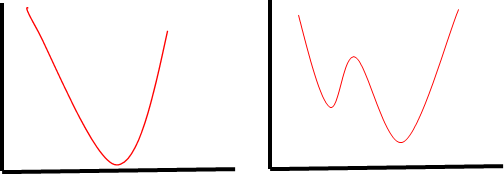





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

a) In the figure (a) there is only one optimal solution and in figure (b) there is two optimal solution, because figure (a) has the minimal optimal solution it is considered as convex objective function.

b)Learning rate (α) in the Garadient Desent is the hyper-parameter which can assist with arriving at the convergence point. smaller the learning rate higher is the exactness of the model. If learning rate is too little then the calculation will find a way to get to the base. On the off chance that learning rate is excessively huge, the calculation can miss the base point, in particular it neglects to converge.In the Worst case, it could separate from the base, which may devour an unbounded measure of time.

C)Let us think about the above Assuming figure (b) as a 1D portrayal of the geography of a scene and we are remaining at peak in the figure and looking towards right. Presently on the off chance that we move the forward way and come to the downhill,we arrive at worldwide minima and in the event that we move in reverse and arrive at the declining, we arrive at neighborhood minima. 

So as to locate the worldwide minima for the target work appeared in Figure-b,the number of steps to be taken would be chosen by the hyper boundary 'α' (learning rate). Higher learning rate would bring about quicker coming to worldwide minima and littler learning rate would result to additional time in arriving at worldwide minima. Also, above all on the off chance that learning rate is far more bigger than expected, at that point it probably won't arrive at worldwide minima. So realizing the learning rate to be utilized and the bearing of move would bring about accomplishing worldwide minima.